In [59]:
class TrieH:
    def __init__(self , c , inf, eq , sup, v=None ):
        self.c = c
        self.inf = inf
        self.eq = eq
        self.sup = sup
        self.v = v

In [60]:
class TH:
    def __init__(self):
        self.root = None

    def EstVide(self):
        return self.root == None
    
    def lg(self , mot):
        return len(mot)

    def prem(self , mot):
        return mot[0]
    
    def reste(self , mot):
        return mot[1:]

    def TH_Vide(self):
        return None
    
    def ValVide(self):
        return None
    
    def TH_Racine(self):
        return self.root.c
    
    def Inf(self):
        return self.root.inf

    def Eq(self):
        return self.root.eq
    
    def Sup(self):
        return self.root.sup
    
    def Val(self):
        return self.root.v
    

    def TH_Ajout(self, mot, A , v):
        if A is None:
            if self.lg(mot) == 1:
                print("ici", mot)
                return TrieH(self.prem(mot) , None , None , None , v)
            else:
                print("la", mot)
                A = TrieH(self.prem(mot) , None , self.TH_Ajout(self.reste(mot), self.TH_Vide() , v) , None , None)
                return A
        else:
            p = self.prem(mot)
            if p < A.c:
                print("inf")
                # A.inf = self.TH_Ajout( mot , A.inf , v)
                return TrieH(A.c , self.TH_Ajout( mot , A.inf , v) , A.eq , A.sup , A.v)
            if p > A.c:
                print("sup")
                # A.sup = self.TH_Ajout( mot , A.sup , v)
                return TrieH(A.c , A.inf , A.eq , self.TH_Ajout( mot , A.sup , v) , A.v)
            return TrieH(A.c , A.inf , self.TH_Ajout( self.reste(mot) , A.eq , v) , A.sup , A.v)


    def TH_Recherche(self, mot, A):
        if A is None:
            return False
        if self.lg(mot) == 1 and A.c == mot and A.v is not None:
            return True
        p = self.prem(mot)
        if p < A.c:
            return self.TH_Recherche(mot, A.inf)
        elif p > A.c:
            return self.TH_Recherche(mot, A.sup)
        else:
            return self.TH_Recherche(self.reste(mot), A.eq)
        
    def TH_Supprimer(self, mot, A):
        if A is None:
            return None
        p = self.prem(mot)
        if p < A.c:
            A.inf = self.TH_Supprimer(mot, A.inf)
        elif p > A.c:
            A.sup = self.TH_Supprimer(mot, A.sup)
        else:
            if self.lg(mot) == 1:
                if A.v is not None:
                    A.v = None
            else:
                A.eq = self.TH_Supprimer(self.reste(mot), A.eq)
        if A.inf is None and A.eq is None and A.sup is None and A.v is None:
            return None
        return A


def afficher_trie_hybride_arbre(A, prefixe="", est_dernier=True, lien=""):
    if A is not None:
        marker = "└── " if est_dernier else "├── "
        print(f"{prefixe}{marker}Caractère: {A.c} ({lien})", "Valeur: ", A.v if A.v is not None else "None")
        afficher_trie_hybride_arbre(A.inf, f"{prefixe}{'    ' if est_dernier else '│   '}", False, "Inf")
        afficher_trie_hybride_arbre(A.eq, f"{prefixe}{'    ' if est_dernier else '│   '}", False, "Eq")
        afficher_trie_hybride_arbre(A.sup, f"{prefixe}{'    ' if est_dernier else '│   '}", True, "Sup")


In [61]:
trie_hybride = TH()

trie_hybride.root = trie_hybride.TH_Ajout("chat", trie_hybride.root, 1)
afficher_trie_hybride_arbre(trie_hybride.root)
print("--------------------------------------------------")

trie_hybride.root = trie_hybride.TH_Ajout("chien", trie_hybride.root, 2)
afficher_trie_hybride_arbre(trie_hybride.root)
print("--------------------------------------------------")

trie_hybride.root = trie_hybride.TH_Ajout("cheval", trie_hybride.root, 3)
afficher_trie_hybride_arbre(trie_hybride.root)
print("--------------------------------------------------")

trie_hybride.root = trie_hybride.TH_Ajout("bonjour", trie_hybride.root, 4)
afficher_trie_hybride_arbre(trie_hybride.root)
print("--------------------------------------------------")

trie_hybride.root = trie_hybride.TH_Ajout("bien", trie_hybride.root, 5)
afficher_trie_hybride_arbre(trie_hybride.root)
print("--------------------------------------------------")

trie_hybride.root = trie_hybride.TH_Ajout("merci", trie_hybride.root, 6)
afficher_trie_hybride_arbre(trie_hybride.root)
print("--------------------------------------------------")

trouver = trie_hybride.TH_Recherche("chat", trie_hybride.root)
print(trouver)

trouver = trie_hybride.TH_Recherche("meow", trie_hybride.root)
print(trouver)

trouver = trie_hybride.TH_Recherche("chien", trie_hybride.root)
print(trouver)

trouver = trie_hybride.TH_Recherche("vache", trie_hybride.root)
print(trouver)

la chat
la hat
la at
ici t
└── Caractère: c () Valeur:  None
    ├── Caractère: h (Eq) Valeur:  None
    │   ├── Caractère: a (Eq) Valeur:  None
    │   │   ├── Caractère: t (Eq) Valeur:  1
--------------------------------------------------
sup
la ien
la en
ici n
└── Caractère: c () Valeur:  None
    ├── Caractère: h (Eq) Valeur:  None
    │   ├── Caractère: a (Eq) Valeur:  None
    │   │   ├── Caractère: t (Eq) Valeur:  1
    │   │   └── Caractère: i (Sup) Valeur:  None
    │   │       ├── Caractère: e (Eq) Valeur:  None
    │   │       │   ├── Caractère: n (Eq) Valeur:  2
--------------------------------------------------
sup
inf
la eval
la val
la al
ici l
└── Caractère: c () Valeur:  None
    ├── Caractère: h (Eq) Valeur:  None
    │   ├── Caractère: a (Eq) Valeur:  None
    │   │   ├── Caractère: t (Eq) Valeur:  1
    │   │   └── Caractère: i (Sup) Valeur:  None
    │   │       ├── Caractère: e (Inf) Valeur:  None
    │   │       │   ├── Caractère: v (Eq) Valeur:  None
    │   │   

In [62]:
from graphviz import Digraph

In [63]:
def visualiser_arbre(arbre):
    dot = Digraph()

    def generer_graphique(A, dot=dot):
        if A is not None:
            dot.node(str(id(A)), label=f"{A.c} ({str(A.v) if A.v is not None else ''})")

            if A.inf is not None:
                dot.node(str(id(A.inf)), label=f"{A.inf.c} (Inf)")
                dot.edge(str(id(A)), str(id(A.inf)) , label="Inf", fontsize="10" )
                generer_graphique(A.inf)

            if A.eq is not None:
                dot.node(str(id(A.eq)), label=f"{A.eq.c} (Eq)")
                dot.edge(str(id(A)), str(id(A.eq)) , label="Eq", fontsize="10")
                generer_graphique(A.eq)

            if A.sup is not None:
                dot.node(str(id(A.sup)), label=f"{A.sup.c} (Sup)")
                dot.edge(str(id(A)), str(id(A.sup)) , label="Sup", fontsize="10")
                generer_graphique(A.sup)

    generer_graphique(arbre)
    return dot

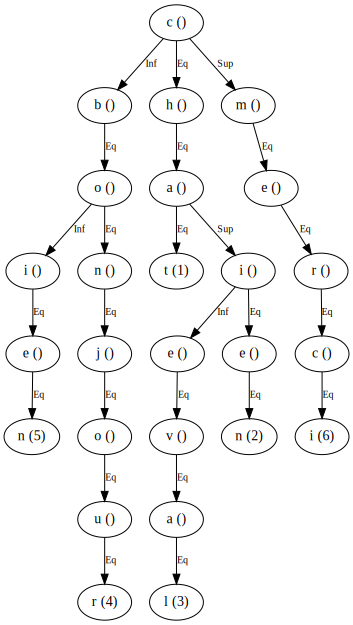

In [64]:
visualiser_arbre(trie_hybride.root)

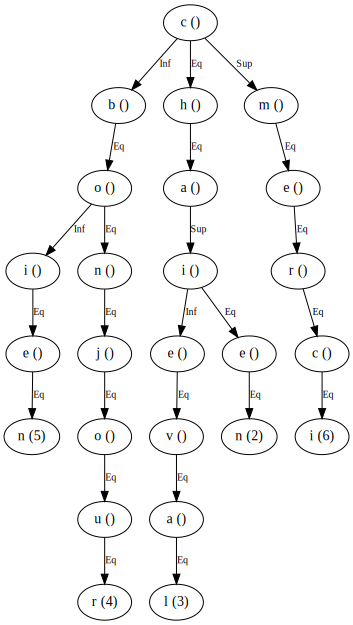

In [65]:
trie_hybride.TH_Supprimer("chat", trie_hybride.root)
visualiser_arbre(trie_hybride.root)

la ton
la on
ici n


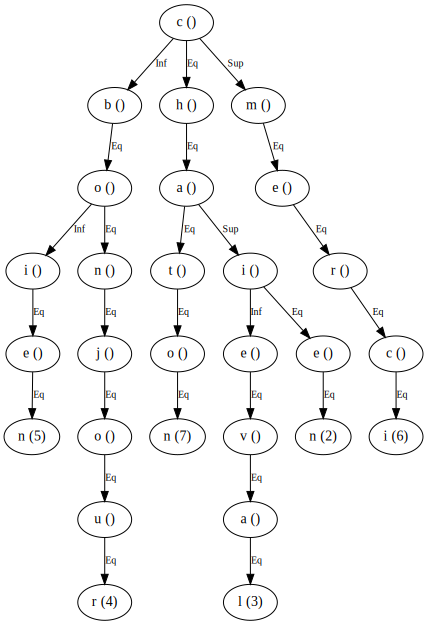

In [68]:
trie_hybride.root = trie_hybride.TH_Ajout("chaton", trie_hybride.root, 7)
visualiser_arbre(trie_hybride.root)